<a href="https://colab.research.google.com/github/tomoyukiharada/Kaggle-team/blob/main/kaggle(2)_yoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with an Academic Success Dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
f = open("/content/drive/MyDrive/Kaggle/Classification with an Academic Success Dataset/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

In [ ]:
!kaggle competitions download -c playground-series-s4e6

  0% 0.00/3.07M [00:00<?, ?B/s]
100% 3.07M/3.07M [00:00<00:00, 210MB/s]


In [ ]:
!unzip playground-series-s4e6.zip

Archive:  playground-series-s4e6.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 1. Imports and Configs

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import keras_tuner as kt
from keras_tuner import Hyperband

## 2. Data Loading and Overview

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_copy = train.copy()
test_copy = test.copy()

In [ ]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
test_copy.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [ ]:
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [ ]:
train.isnull().any()

id                                                False
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                         

In [ ]:
Target = pd.get_dummies(train["Target"], dtype="uint8")

In [ ]:
Target

,Dropout,Enrolled,Graduate
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
76513,0,0,1
76514,0,0,1
76515,0,1,0
76516,1,0,0


## 3. Modeling

In [ ]:
train = train.drop(["id", "Target"], axis=1)
test = test.drop(["id"], axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(76518, 36)
(51012, 36)


In [ ]:
train_test = pd.concat([train, test])

In [ ]:
train_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,2,39,1,9119,1,19,133.1,1,19,37,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,1,1,1,171,1,1,127.0,1,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,1,1,3,9773,1,1,132.0,1,19,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [ ]:
train_test = pd.get_dummies(train_test, columns=["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Nacionality", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International"], dtype="uint8", drop_first=True)

In [ ]:
train_test

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,1,1,126.0,1,19,122.6,18,0,6,6,...,0,0,0,0,0,0,1,0,1,0
1,1,1,125.0,19,19,119.8,18,0,6,8,...,0,0,0,1,0,0,1,0,0,0
2,2,1,137.0,3,19,144.7,18,0,6,0,...,0,0,0,0,0,0,1,1,0,0
3,3,1,131.0,19,3,126.1,18,0,7,9,...,0,0,0,1,0,0,1,0,1,0
4,2,1,132.0,19,37,120.1,18,0,7,12,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,2,1,128.0,38,37,124.7,19,0,0,0,...,0,0,0,1,0,0,1,0,0,0
51008,1,19,133.1,19,37,140.0,33,0,5,6,...,0,0,0,0,0,1,0,1,0,0
51009,1,1,127.0,1,1,120.4,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51010,3,1,132.0,19,19,126.3,18,0,6,8,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
train_s = train_test.iloc[:76518,:]
test_s = train_test.iloc[76518:,:]

In [ ]:
print(train_s.shape)
print(test_s.shape)

(76518, 199)
(51012, 199)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_s, Target, test_size=0.2, random_state=23)

In [ ]:
X_train.shape[0]

61214

In [ ]:
model =models.Sequential()
model.add(layers.Dense(512, input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape

(61214, 199)

In [ ]:
cs = keras.callbacks.EarlyStopping(monitor="accuracy", patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, callbacks=cs, validation_data=(X_valid, y_valid))

Epoch 1/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4667 - accuracy: 0.8190 - val_loss: 0.6348 - val_accuracy: 0.7362
Epoch 2/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4637 - accuracy: 0.8195 - val_loss: 0.8778 - val_accuracy: 0.5981
Epoch 3/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4648 - accuracy: 0.8194 - val_loss: 0.5993 - val_accuracy: 0.7682
Epoch 4/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4620 - accuracy: 0.8197 - val_loss: 0.6980 - val_accuracy: 0.7048
Epoch 5/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4623 - accuracy: 0.8195 - val_loss: 0.6415 - val_accuracy: 0.7533
Epoch 6/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4611 - accuracy: 0.8203 - val_loss: 0.4828 - val_accuracy: 0.8144
Epoch 7/100
479/479 [==============================] - 4s 9ms/step - loss: 0.4604 - accuracy: 0.8213 - val_loss: 0.8520 - val_accuracy: 0.7021

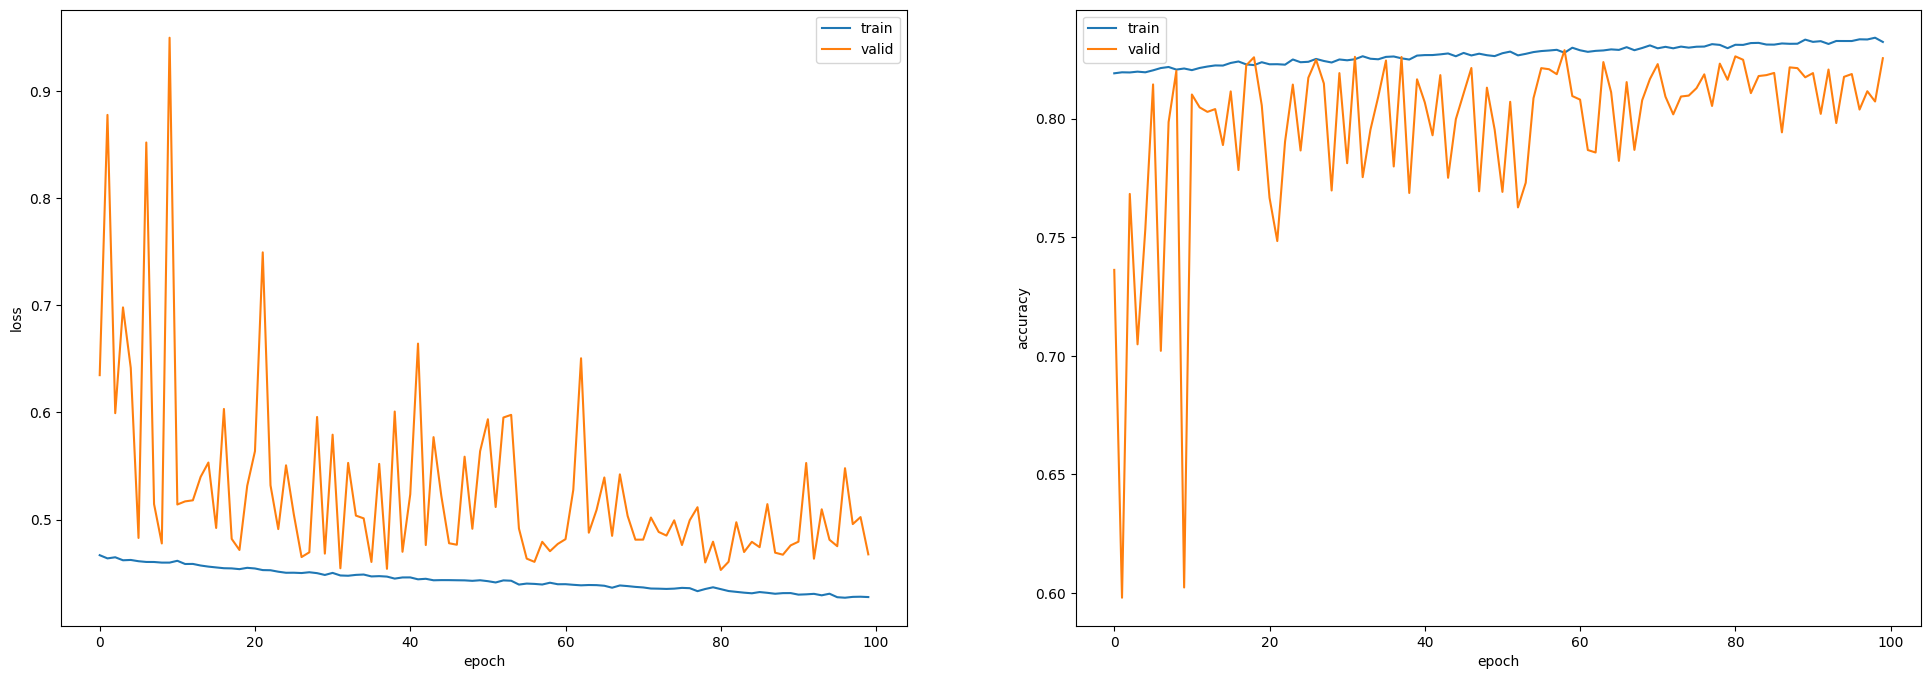

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(train_acc)+1)

fig, ax = plt.subplots(1, 2, figsize=(24, 8))

ax[0].plot(np.array(train_loss), label='train')
ax[0].plot(np.array(valid_loss), label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(train_acc), label='train')
ax[1].plot(np.array(valid_acc), label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()

plt.show()

In [ ]:
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Valid loss: 0.4674723744392395
Valid accuracy: 0.8254051208496094


In [ ]:
test_s

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,1,1,141.0,3,1,152.1,18,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,128.0,1,19,116.5,19,0,6,7,...,0,0,0,0,0,0,1,0,0,0
2,1,1,118.0,1,19,114.2,18,0,6,11,...,0,0,0,0,0,0,1,0,1,0
3,1,39,130.0,1,19,130.0,23,2,6,15,...,0,0,0,0,0,0,1,0,1,0
4,1,1,110.0,1,37,106.0,26,0,6,9,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,2,1,128.0,38,37,124.7,19,0,0,0,...,0,0,0,1,0,0,1,0,0,0
51008,1,19,133.1,19,37,140.0,33,0,5,6,...,0,0,0,0,0,1,0,1,0,0
51009,1,1,127.0,1,1,120.4,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51010,3,1,132.0,19,19,126.3,18,0,6,8,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
label_mapping = ['Dropout', 'Enrolled', 'Graduate']

keras_preds = model.predict(test_s)
keras_preds = np.argmax(keras_preds, axis=1)
keras_preds_labels = [label_mapping[i] for i in keras_preds]

keras_result = pd.DataFrame(
    {
        'id': test_copy['id'],
        'Target': keras_preds_labels
    }
)

keras_result.to_csv('submission_keras.csv', index=False)

from google.colab import files
files.download('submission_keras.csv')

1595/1595 [==============================] - 3s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
keras_result

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [ ]:
keras_predict_proba = model.predict(test_s)
keras_predict_proba = pd.DataFrame(keras_predict_proba)

1595/1595 [==============================] - 3s 2ms/step


In [ ]:
sub_predict_proba = pd.concat([test_copy["id"], keras_predict_proba], axis=1)
sub_predict_proba.to_csv('predict_proba_keras.csv', index=False)

from google.colab import files
files.download('predict_proba_keras.csv')

sub_predict_proba

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,0,1,2
0,76518,0.991107,0.000129,0.008764
1,76519,0.000450,0.008007,0.991543
2,76520,0.014950,0.252947,0.732102
3,76521,0.103354,0.585217,0.311429
4,76522,0.121273,0.850447,0.028280
...,...,...,...,...
51007,127525,0.699094,0.033358,0.267548
51008,127526,0.995112,0.004567,0.000321
51009,127527,0.975765,0.011606,0.012629
51010,127528,0.798554,0.176181,0.025265
